In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utility import grangers_causation_matrix,granger_test,adf_test
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
from scipy.stats import spearmanr,pearsonr
from statsmodels.tsa.stattools import ccf
sns.set_theme(style="whitegrid")

In [2]:
mins_played=pd.read_excel("Under21_minutes_played.xlsx",index_col=0)
all_teams=pd.read_excel("Under21_minutes_played_teams.xlsx",index_col=0)

In [3]:
mins_played["Minutes_played_italians"]=mins_played["Minutes_played_italians"]+mins_played["Minutes_played_oriundi"]

# Granger Casuality Test and CCN

In [4]:
grangers_causation_matrix(mins_played[['Minutes_played_under21','Minutes_played_italians','Minutes_played_foreigners','Fifa_points','Points_naz_u21','revenue']][27:-2], variables = mins_played[['Minutes_played_under21','Minutes_played_italians','Minutes_played_foreigners','Fifa_points','Points_naz_u21','revenue']][27:-2].columns)

,Minutes_played_under21_x,Minutes_played_italians_x,Minutes_played_foreigners_x,Fifa_points_x,Points_naz_u21_x,revenue_x
Minutes_played_under21_y,1.0000,0.5880,0.5880,0.0285,0.2245,0.0022
Minutes_played_italians_y,0.4130,1.0000,0.4130,0.0041,0.0389,0.0836
Minutes_played_foreigners_y,0.2737,0.2737,1.0000,0.5093,0.0010,0.0008
Fifa_points_y,0.0738,0.4442,0.2491,1.0000,0.0504,0.1093
Points_naz_u21_y,0.2435,0.0255,0.0691,0.1597,1.0000,0.0676
revenue_y,0.0000,0.2739,0.0003,0.5133,0.0000,1.0000


In [55]:
adf_test(mins_played[["Minutes_played_italians","Fifa_points"]][27:])

,Minutes_played_italians,Fifa_points
Test statistic,-3.0823,-3.0548
p-value,0.0279,0.0301
Critical value - 1%,-3.6889,-3.6996
Critical value - 5%,-2.9720,-2.9764
Critical value - 10%,-2.6253,-2.6276


In [4]:
granger_test(mins_played[['Fifa_points','Minutes_played_italians']][27:],4,2,"Fifa_points and Minutes played by Italian U21 players")

--------------------------------------------------------------------------------------------
Grenger Causality Test Results for: Fifa_points and Minutes played by Italian U21 players 
--------------------------------------------------------------------------------------------
   Lag  Test Statistic   P-value
1  1.0        1.078719  0.583122
2  2.0        1.282952  0.733185
3  3.0        2.596989  0.627357


In [9]:
test_result=grangercausalitytests(mins_played[['Fifa_points','Minutes_played_italians']][27:],maxlag=5,verbose=False)
test_result_df=pd.DataFrame(columns=['Lag','Test Statistic','P-value'])
for i in range(3,6):
    test_result_df.loc[i-1]=[i-1,test_result[i][0]['ssr_chi2test'][0],test_result[i][0]['ssr_chi2test'][1]]
print("--------------------------------------------------------------------------------------------")
print("Grenger Causality Test Results for: Fifa_points and Minutes played by Italian U21 players")
print("--------------------------------------------------------------------------------------------")
print(test_result_df)


--------------------------------------------------------------------------------------------
Grenger Causality Test Results for: Fifa_points and Minutes played by Italian U21 players
--------------------------------------------------------------------------------------------
   Lag  Test Statistic   P-value
1  1.0        1.233485  0.539700
2  2.0        1.319414  0.724528
3  3.0        3.083035  0.544027


In [6]:
from statsmodels.tsa.stattools import ccf
#ccf(mins_played["Points_naz_u21"][22:],mins_played["Minutes_played_italians"][22:],adjusted=False)
cross_corr_ita_fifa=ccf(mins_played["Fifa_points"][25:-2],mins_played["Minutes_played_italians"][25:-2],adjusted=True)
corr_pearson_ita_fifa=pearsonr(mins_played["Fifa_points"][25:],mins_played["Minutes_played_italians"][25:],alternative='greater')
print(f"Peason Correlation: {round(corr_pearson_ita_fifa.statistic,4)}, P-value {round(corr_pearson_ita_fifa.pvalue,4)}")
print(f"Correlation Minutes_played_italians e Fifa_points Lag 0: {round(cross_corr_ita_fifa[0],5)}")
print(f"Correlation Minutes_played_italians e Fifa_points Lag 1: {round(cross_corr_ita_fifa[1],4)}")
print(f"Correlation Minutes_played_italians e Fifa_points Lag 2: {round(cross_corr_ita_fifa[2],4)}")
#crea una tabella con i valori di cross correlation


corr_spearman_ita_nazu21=pearsonr(mins_played["Fifa_points"][27:-2],mins_played["Minutes_played_italians"][27:-2])
corr_spearman_ita_nazu21_lag1=pearsonr(mins_played["Fifa_points"][27:-2],mins_played["Minutes_played_italians"][26:-2].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=pearsonr(mins_played["Fifa_points"][27:-2],mins_played["Minutes_played_italians"][25:-2].shift(2).dropna())


print(f"Spearman Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")


Peason Correlation: 0.0927, P-value 0.31
Correlation Minutes_played_italians e Fifa_points Lag 0: 0.09003
Correlation Minutes_played_italians e Fifa_points Lag 1: 0.0378
Correlation Minutes_played_italians e Fifa_points Lag 2: 0.0792
Spearman Correlation: -0.0195, P-value 0.9231
Lag1 Correlation: 0.007, P-value 0.9722
Lag2 Correlation: 0.0814, P-value 0.6864


In [53]:
corr_spearman_ita_nazu21=spearmanr(mins_played["revenue"][28:],mins_played["Minutes_played_under21"][28:])
corr_spearman_ita_nazu21_lag1=spearmanr(mins_played["revenue"][28:],mins_played["Minutes_played_italians"][27:].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=spearmanr(mins_played["revenue"][28:],mins_played["Minutes_played_italians"][26:].shift(2).dropna())


print(f"Peason Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")


for i in range(len(mins_played[26:-15])):
    corr_shift_1=pearsonr(mins_played["revenue"][26+i:],mins_played["Minutes_played_under21"][25+i:].shift(1).dropna(),alternative='two-sided')
    corr_shift_2=pearsonr(mins_played["revenue"][26+i:],mins_played["Minutes_played_under21"][24+i:].shift(2).dropna(),alternative='two-sided')
    corr_shift_3=pearsonr(mins_played["revenue"][26+i:],mins_played["Minutes_played_under21"][23+i:].shift(3).dropna(),alternative='two-sided')

    corr=pearsonr(mins_played["revenue"][26+i:],mins_played["Minutes_played_under21"][26+i:],alternative='two-sided')
    #if corr_shift>corr:
    print(f"{26 + i}  corr {corr.statistic},corr_shift_1 {corr_shift_1.statistic},corr_shift_2 {corr_shift_2.statistic}, corr_shift_3 {corr_shift_3.statistic}")

Peason Correlation: 0.3333, P-value 0.083
Lag1 Correlation: -0.237, P-value 0.2246
Lag2 Correlation: -0.4313, P-value 0.0219
26  corr 0.2486084547631588,corr_shift_1 0.3064716135331597,corr_shift_2 0.03914700588473349, corr_shift_3 0.12401942742341328
27  corr 0.275482260694799,corr_shift_1 0.32851497481057623,corr_shift_2 0.008359845900238182, corr_shift_3 0.1701119654279409
28  corr 0.31265300623379483,corr_shift_1 0.38336722109632526,corr_shift_2 -0.01114810424012269, corr_shift_3 0.1597194088083001
29  corr 0.32401794237137843,corr_shift_1 0.4171192891221587,corr_shift_2 -0.015611622337043081, corr_shift_3 0.16231455111330226
30  corr 0.30233894242361603,corr_shift_1 0.42202848419643973,corr_shift_2 -0.02125386387796877, corr_shift_3 0.1680220061821322
31  corr 0.30311786788943507,corr_shift_1 0.4195064450581969,corr_shift_2 -0.02358899994286623, corr_shift_3 0.16752810938901408
32  corr 0.31213843353044596,corr_shift_1 0.42018402484294975,corr_shift_2 -0.02834150835980767, corr_sh

<Axes: >

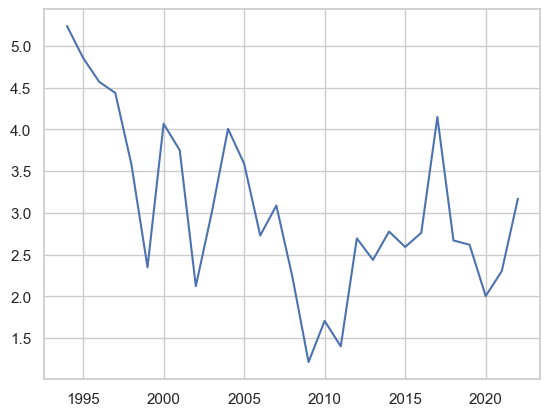

In [87]:
mins_played["Minutes_played_italians"][27:].plot()

In [80]:
adf_test(mins_played[["Minutes_played_italians","Points_naz_u21"]][27:])

,Minutes_played_italians,Points_naz_u21
Test statistic,-2.8789,-4.5535
p-value,0.0479,0.0002
Critical value - 1%,-3.6791,-3.6791
Critical value - 5%,-2.9679,-2.9679
Critical value - 10%,-2.6232,-2.6232


In [86]:

cross_corr_ita_nazu21=ccf(mins_played["Points_naz_u21"][27:],mins_played["Minutes_played_italians"][27:],adjusted=True)
corr_pearson_ita_nazu21=pearsonr(mins_played["Points_naz_u21"][24:-2],mins_played["Minutes_played_italians"][24:-2],alternative='greater')
print("Cross correlation between Italian U21 players and National Team U21 Points")
print("--------------------------------------------------------------------------------------------")
print(f"Peason Correlation: {round(corr_pearson_ita_nazu21.statistic,4)}, P-value {round(corr_pearson_ita_nazu21.pvalue,4)}")
print(f"Correlation Minutes_played_italians e Points_naz_u21 Lag 0: {round(cross_corr_ita_nazu21[0],4)}")
print(f"Correlation Minutes_played_italians e Points_naz_u21 Lag 1: {round(cross_corr_ita_nazu21[3],4)}")
print(f"Correlation Minutes_played_italians e Points_naz_u21 Lag 2: {round(cross_corr_ita_nazu21[1],4)}")


print("--------------------------------------------------------------------------------------------")

corr_spearman_ita_nazu21=spearmanr(mins_played["Points_naz_u21"][24:-2],mins_played["Minutes_played_italians"][24:-2])
corr_spearman_ita_nazu21_lag1=spearmanr(mins_played["Points_naz_u21"][24:-2],mins_played["Minutes_played_italians"][23:-2].shift(1).dropna())
corr_spearman_ita_nazu21_lag2=spearmanr(mins_played["Points_naz_u21"][24:-2],mins_played["Minutes_played_italians"][22:-2].shift(2).dropna())


print(f"Spearman Correlation: {round(corr_spearman_ita_nazu21.statistic,4)}, P-value {round(corr_spearman_ita_nazu21.pvalue,4)}")
print(f"Lag1 Correlation: {round(corr_spearman_ita_nazu21_lag1.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag1.pvalue,4)}")
print(f"Lag2 Correlation: {round(corr_spearman_ita_nazu21_lag2.statistic,4)}, P-value {round(corr_spearman_ita_nazu21_lag2.pvalue,4)}")




Cross correlation between Italian U21 players and National Team U21 Points
--------------------------------------------------------------------------------------------
Peason Correlation: 0.4989, P-value 0.0025
Correlation Minutes_played_italians e Points_naz_u21 Lag 0: 0.3682
Correlation Minutes_played_italians e Points_naz_u21 Lag 1: 0.1695
Correlation Minutes_played_italians e Points_naz_u21 Lag 2: 0.1218
--------------------------------------------------------------------------------------------
Spearman Correlation: 0.566, P-value 0.0011
Lag1 Correlation: 0.4133, P-value 0.0232
Lag2 Correlation: 0.3897, P-value 0.0333


In [85]:
granger_test(mins_played[['Points_naz_u21','Minutes_played_italians']][28:],5,3,"Points_naz_u21 and Minutes played by Italian U21 players")

--------------------------------------------------------------------------------------------
Grenger Causality Test Results for: Points_naz_u21 and Minutes played by Italian U21 players 
--------------------------------------------------------------------------------------------
   Lag  Test Statistic   P-value
2  2.0       12.867615  0.004932
3  3.0       13.344389  0.009710
4  4.0       11.957117  0.035380


In [25]:
test_result=grangercausalitytests(mins_played[['Points_naz_u21','Minutes_played_italians']][28:-1],maxlag=5,verbose=False)
#create a dataframe with the results of the granger causality test
test_result_df=pd.DataFrame(columns=['Lag','Test Statistic','P-value'])
for i in range(3,6):
    test_result_df.loc[i-2]=[i-2,test_result[i][0]['ssr_chi2test'][0],test_result[i][0]['ssr_chi2test'][1]]
print("Grenger Causality Test Results for: Points_naz_u21 and Minutes played by Italian U21 players")
print(test_result_df)




Grenger Causality Test Results for: Points_naz_u21 and Minutes played by Italian U21 players
   Lag  Test Statistic   P-value
1  1.0       12.867615  0.004932
2  2.0       13.344389  0.009710
3  3.0       11.957117  0.035380


In [41]:
granger_test(mins_played[['revenue','Minutes_played_under21']][28:],4,2)

--------------------------------------------------------------------------------------------
Grenger Causality Test Results for: Fifa_points and Minutes played by Italian U21 players
--------------------------------------------------------------------------------------------
   Lag  Test Statistic   P-value
1  1.0        9.162777  0.010241
2  2.0       21.519095  0.000082
3  3.0       19.717000  0.000568


In [37]:
from statsmodels.tsa.stattools import grangercausalitytests

test_result=grangercausalitytests(mins_played[['revenue','Minutes_played_under21']][28:-1],maxlag=4,verbose=False)
test_result_df=pd.DataFrame(columns=['Lag','Test Statistic','P-value'])
for i in range(2,5):
    test_result_df.loc[i-1]=[i-1,test_result[i][0]['ssr_chi2test'][0],test_result[i][0]['ssr_chi2test'][1]]
print("Grenger Causality Test Results for: Profit and Minutes played by U21 players")
print(test_result_df)

Grenger Causality Test Results for: Profit and Minutes played by U21 players
   Lag  Test Statistic   P-value
1  1.0        9.162777  0.010241
2  2.0       21.519095  0.000082
3  3.0       19.717000  0.000568


In [ ]:
from statsmodels.tsa.stattools import ccf

cross_corr=ccf(mins_played["revenue"][29:],mins_played["Minutes_played_under21"][29:],adjusted=True)
corr_pearson_ita_fifa=pearsonr(mins_played["revenue"][26:],mins_played["Minutes_played_under21"][26:],alternative='two-sided')
print("Cross correlation between U21 players and Profit")
print("--------------------------------------------------------------------------------------------")
print(f"Peason Correlation: {round(corr_pearson_ita_fifa.statistic,4)}, P-value {round(corr_pearson_ita_fifa.pvalue,4)}")
print(f"Correlation Minutes_played_under21 e Entrate Lag 0: {round(cross_corr[0],4)}")
print(f"Correlation Minutes_played_under21 e Entrate Lag 1: {round(cross_corr[1],4)}")
print(f"Correlation Minutes_played_under21 e Entrate Lag 2: {round(cross_corr[3],4)}")
print("--------------------------------------------------------------------------------------------")

Cross correlation between U21 players and Profit
--------------------------------------------------------------------------------------------
Peason Correlation: 0.2486, P-value 0.1853
Correlation Minuti giocati under21 e Entrate Lag 0: 0.324
Correlation Minuti giocati under21 e Entrate Lag 1: 0.4178
Correlation Minuti giocati under21 e Entrate Lag 2: 0.1756
--------------------------------------------------------------------------------------------


<Axes: >

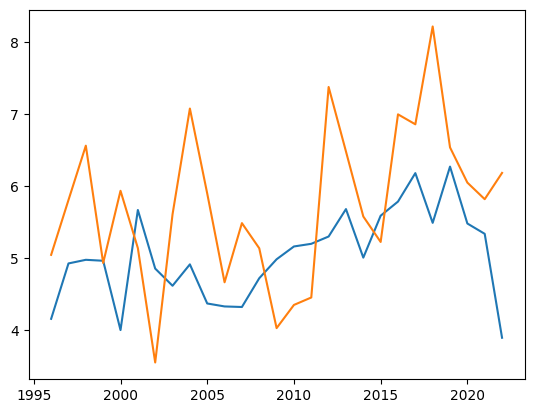

In [ ]:
mins_played["revenue"][29:].plot()
mins_played["Minutes_played_under21"][29:].plot()


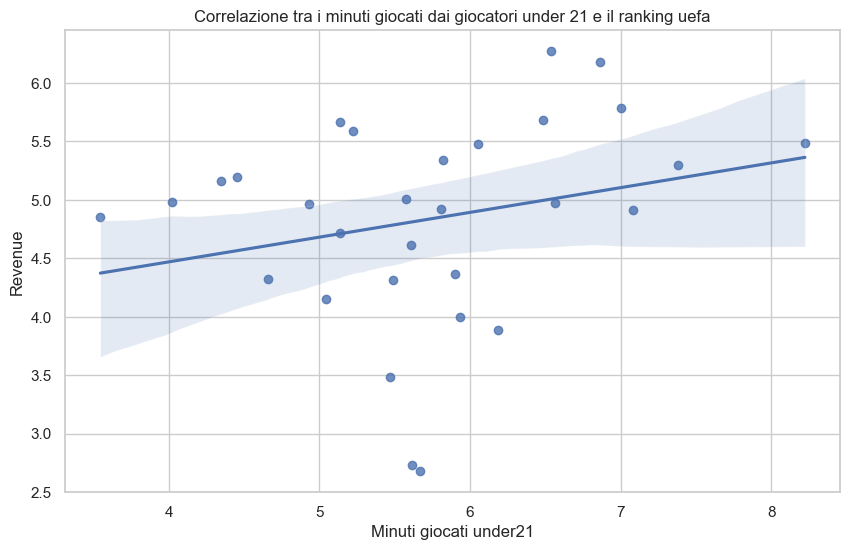

In [ ]:
#stampa il grafico della correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa come retta di regressione
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(x=mins_played["Minutes_played_under21"], y=mins_played["revenue"])
plt.xlabel("Minutes_played_under21")
plt.ylabel("Revenue")
plt.title("Correlazione tra i minuti giocati dai giocatori under 21 e il ranking uefa")
plt.show()



In [ ]:
#fai la OLS regression tra i minuti giocati dai giocatori under 21 e il ranking uefa
import statsmodels.api as sm

X = mins_played["Minutes_played_under21"][29:-1]
y = mins_played["revenue"][29:-1]
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     4.112
Date:                Tue, 06 Feb 2024   Prob (F-statistic):             0.0538
Time:                        13:38:59   Log-Likelihood:                -20.655
No. Observations:                  26   AIC:                             45.31
Df Residuals:                      24   BIC:                             47.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3